In [128]:
# Load modules
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
# Load CSV
cars = pd.read_csv('car_price.csv', encoding='ISO-8859-1',  names=['id', 'sellTime', 'name', 'usage', 'offer', 'price', 'type', 'yearOfManufacture', 'gear', 'horsepower', 'kms', 'mileage', 'fuelType', 'secondhand', 'datePurchased', 'zero'])

In [130]:
cars.shape

(1000, 16)

In [131]:
cars.columns

Index(['id', 'sellTime', 'name', 'usage', 'offer', 'price', 'type',
       'yearOfManufacture', 'gear', 'horsepower', 'kms', 'mileage', 'fuelType',
       'secondhand', 'datePurchased', 'zero'],
      dtype='object')

In [132]:
cars.head(5)

,id,sellTime,name,usage,offer,price,type,yearOfManufacture,gear,horsepower,kms,mileage,fuelType,secondhand,datePurchased,zero
0,1,03-04-2016 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,50000.0,7,petrol,No,03-04-2016 00:00,0
1,2,08-03-2016 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,150000.0,5,diesel,No,08-03-2016 00:00,0
2,3,26-03-2016 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150,150000.0,2,diesel,No,26-03-2016 00:00,0
3,4,11-03-2016 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150,150000.0,9,diesel,No,11-03-2016 00:00,0
4,5,17-03-2016 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200,125000.0,3,petrol,No,17-03-2016 00:00,0


In [133]:
## Preprocessing / Cleansing the data

In [134]:
# Duplicates
cars[cars.duplicated()] # No duplicates

,id,sellTime,name,usage,offer,price,type,yearOfManufacture,gear,horsepower,kms,mileage,fuelType,secondhand,datePurchased,zero


In [135]:
cars.nunique().sort_values()

usage                   1
offer                   1
zero                    1
gear                    2
secondhand              2
fuelType                4
type                    8
kms                    13
mileage                13
yearOfManufacture      17
datePurchased          37
horsepower            136
price                 406
sellTime              967
name                  970
id                   1000
dtype: int64

In [136]:
# Removing unnecessary columns
cars.drop(columns=['id', 'name', 'datePurchased', 'sellTime', 'usage', 'offer', 'zero'], inplace=True) 

In [137]:
cars.columns

Index(['price', 'type', 'yearOfManufacture', 'gear', 'horsepower', 'kms',
       'mileage', 'fuelType', 'secondhand'],
      dtype='object')

In [138]:
cars.head(10)

,price,type,yearOfManufacture,gear,horsepower,kms,mileage,fuelType,secondhand
0,3850,Small Car,2004,manual,94,50000.0,7,petrol,No
1,5999,Combi,2007,manual,140,150000.0,5,diesel,No
2,5990,limousine,2007,automatic,150,150000.0,2,diesel,No
3,4000,limousine,2005,manual,150,150000.0,9,diesel,No
4,12950,Combi,2005,manual,200,125000.0,3,petrol,No
5,3600,limousine,2000,automatic,129,150000.0,5,petrol,No
6,4450,Combi,2003,manual,131,150000.0,7,diesel,No
7,10500,bus,2010,manual,146,80000.0,8,petrol,No
8,10900,coupe,2004,automatic,333,150000.0,12,petrol,No
9,17250,limousine,2013,manual,122,30000.0,10,petrol,No


In [139]:
# NULL Handling
cars.replace('NA', np.nan, inplace=True)

In [140]:
cars.head(15)

,price,type,yearOfManufacture,gear,horsepower,kms,mileage,fuelType,secondhand
0,3850,Small Car,2004,manual,94,50000.0,7,petrol,No
1,5999,Combi,2007,manual,140,150000.0,5,diesel,No
2,5990,limousine,2007,automatic,150,150000.0,2,diesel,No
3,4000,limousine,2005,manual,150,150000.0,9,diesel,No
4,12950,Combi,2005,manual,200,125000.0,3,petrol,No
5,3600,limousine,2000,automatic,129,150000.0,5,petrol,No
6,4450,Combi,2003,manual,131,150000.0,7,diesel,No
7,10500,bus,2010,manual,146,80000.0,8,petrol,No
8,10900,coupe,2004,automatic,333,150000.0,12,petrol,No
9,17250,limousine,2013,manual,122,30000.0,10,petrol,No


In [141]:
# removing null values
cars.dropna(inplace = True)

In [142]:
cars.head(5)

,price,type,yearOfManufacture,gear,horsepower,kms,mileage,fuelType,secondhand
0,3850,Small Car,2004,manual,94,50000.0,7,petrol,No
1,5999,Combi,2007,manual,140,150000.0,5,diesel,No
2,5990,limousine,2007,automatic,150,150000.0,2,diesel,No
3,4000,limousine,2005,manual,150,150000.0,9,diesel,No
4,12950,Combi,2005,manual,200,125000.0,3,petrol,No


In [143]:
# Categorical boolean mask
categorical_feature_mask = cars.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cars.columns[categorical_feature_mask].tolist()

In [144]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [145]:
# apply le on categorical feature columns
cars[categorical_cols] = cars[categorical_cols].apply(lambda col: le.fit_transform(col))

In [146]:
cars.head(25)

,price,type,yearOfManufacture,gear,horsepower,kms,mileage,fuelType,secondhand
0,3850,2,2004,1,94,50000.0,7,3,0
1,5999,0,2007,1,140,150000.0,5,1,0
2,5990,6,2007,0,150,150000.0,2,1,0
3,4000,6,2005,1,150,150000.0,9,1,0
4,12950,0,2005,1,200,125000.0,3,3,0
5,3600,6,2000,0,129,150000.0,5,3,0
6,4450,0,2003,1,131,150000.0,7,1,0
7,10500,3,2010,1,146,80000.0,8,3,0
8,10900,5,2004,0,333,150000.0,12,3,0
9,17250,6,2013,1,122,30000.0,10,3,0


In [147]:
## Split the data into train and test set

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cars[cars.columns[~cars.columns.isin(['price'])]], 
                                                    cars['price'], 
                                                    test_size = 0.33, 
                                                    random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(560, 8)
(276, 8)
(560,)
(276,)


In [149]:
## Creating model

In [150]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
lm.intercept_

-1501858.4671876386

In [152]:
lm.coef_

array([ 1.91937709e+02,  7.52473205e+02, -7.95240483e+02,  5.21250691e+01,
       -4.40862701e-02,  3.94768255e+00, -6.89973617e+02, -3.23408803e+03])

In [153]:
pd.DataFrame(zip(X_train.columns, lm.coef_.tolist()), columns=["names","coefficient"])

,names,coefficient
0,type,191.937709
1,yearOfManufacture,752.473205
2,gear,-795.240483
3,horsepower,52.125069
4,kms,-0.044086
5,mileage,3.947683
6,fuelType,-689.973617
7,secondhand,-3234.088028


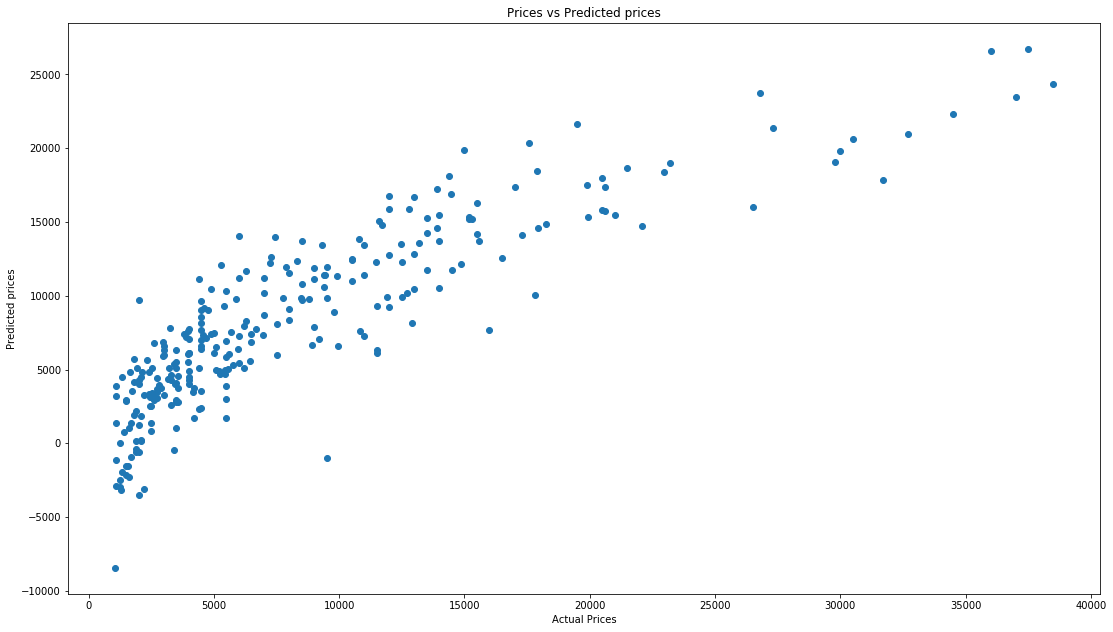

In [154]:
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
#plt.figure(figsize=(250,250))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [155]:
from sklearn.metrics import mean_squared_error
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse1 = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse1))
print("\n")

# model evaluation for testing set
y_test_predict = lm.predict(X_test)
rmse2 = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))



print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse2))

print("\nThe difference is {}".format(abs(rmse1-rmse2)))


The model performance for training set
--------------------------------------
RMSE is 3706.234459668864


The model performance for testing set
--------------------------------------
RMSE is 3785.0164390951472

The difference is 78.78197942628321
